## Problem Statement
A house value is simply more than location and square footage. Like the features that make up a person, an educated party would want to know all aspects that give a house its value.For example, you want to sell a house and you don’t know the price which you can take — it can’t be too low or too high. To find house price you usually try to find similar properties in your neighbourhoodand based on gathered data you will try to assess your house price

## Problem Definition
 When a person want to  sell or buy a house , facing an issue like without knowing the worth of house, house may be sold or bought underestpimate price or  over price, to overcome the issue we analyse with availble feature and predict price.
 
 ## Objective

Build model which will predict the house price when required features passed to the model. So we will
<br><br>
<li> Find out the significant features from the given features dataset which affects the house price the most.</li>
<li> Build best feasible model to predict the house price with 95% confidence level</li>

## Dataset Information
From the above we can see the different columns we have in dataset.

These columns provide below information

<ol>
    <li><b>cid:</b> Notation for a house. Will not of our use. So we will drop this column</li>
    <li><b>dayhours:</b> Represents Date, when house was sold.</li>
    <li><b>price:</b> It's our TARGET feature, that we have to predict based on other featues</li>
    <li><b>room_bed:</b> Represents number of bedrooms in a house</li>
    <li><b>room_bath:</b> Represents number of bathrooms</li>
    <li><b>living_measure:</b> Represents square footage of house</li>
    <li><b>lot_measure:</b> Represents square footage of lot</li>
    <li><b>ceil:</b> Represents number of floors in house</li>
    <li><b>coast:</b> Represents whether house has waterfront view. It seems to be a categorical variable. We will see in our further data analysis</li>
    <li><b>sight:</b> Represents how many times sight has been viewed.</li>
    <li><b>condition:</b> Represents the overall condition of the house. It's kind of rating given to the house.</li>
    <li><b>quality:</b> Represents grade given to the house based on grading system</li>
    <li><b>ceil_measure:</b> Represents square footage of house apart from basement</li>
    <li><b>basement:</b> Represents square footage of basement</li>
    <li><b>yr_built:</b> Represents the year when house was built</li>
    <li><b>yr_renovated:</b> Represents the year when house was last renovated</li>
    <li><b>zipcode:</b> Represents zipcode as name implies</li>
    <li><b>lat:</b> Represents Lattitude co-ordniates</li>
    <li><b>long:</b> Represents Longitude co-ordinates</li>
    <li><b>living_measure15:</b> Represents square footage of house, when measured in 2015 year as house area may or may not changed after renovation if any happened</li>
    <li><b>lot_measure15:</b> Represents square footage of lot, when measured in 2015 year as lot area may or may not change after renovation if any done</li>
    <li><b>furnished:</b> Tells whether house is furnished or not. It seems to be categorical variable as description implies</li>
    <li><b>total_area:</b> Represents total area i.e. area of both living and lot</li>
</ol>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# read the data using pandas function from 'innercity.csv' file
house_df = pd.read_csv('innercity.csv')

In [6]:
# let's check whether data loaded successfully or not, by checking first few records
house_df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,...,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,...,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,...,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,...,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450


In [10]:
# let's check out the columns/features we have in the dataset

house_df.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

In [11]:
# let's see the data types of the features
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21613 non-null  int64  
 4   room_bath         21613 non-null  float64
 5   living_measure    21613 non-null  int64  
 6   lot_measure       21613 non-null  int64  
 7   ceil              21613 non-null  float64
 8   coast             21613 non-null  int64  
 9   sight             21613 non-null  int64  
 10  condition         21613 non-null  int64  
 11  quality           21613 non-null  int64  
 12  ceil_measure      21613 non-null  int64  
 13  basement          21613 non-null  int64  
 14  yr_built          21613 non-null  int64  
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [12]:
# let's check whether our dataset have any null/missing values
house_df.isnull().sum()

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

In [13]:
# let's check whether there's any duplicate record in our dataset or not. If present, we have to remove them
house_df.duplicated().sum()

0

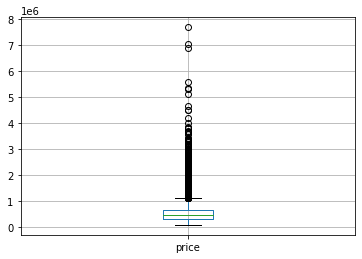

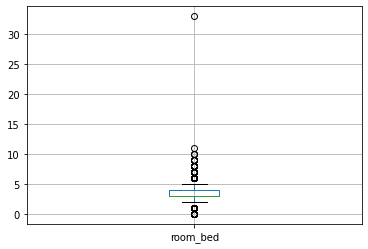

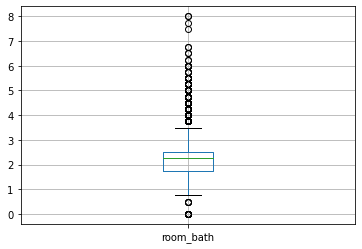

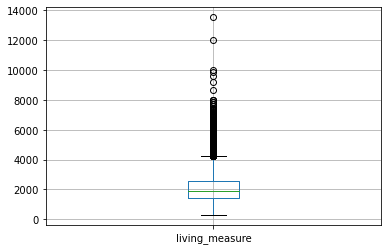

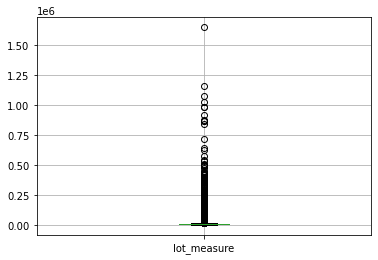

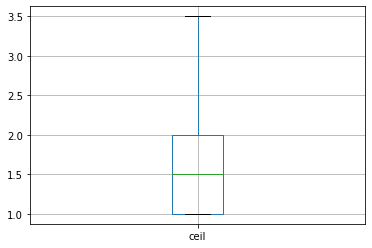

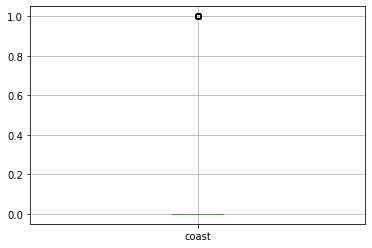

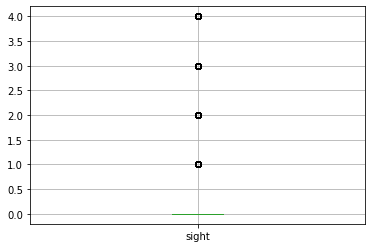

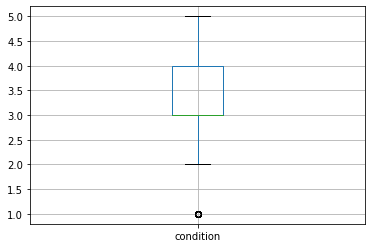

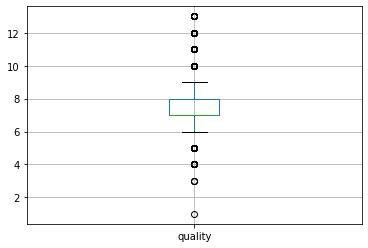

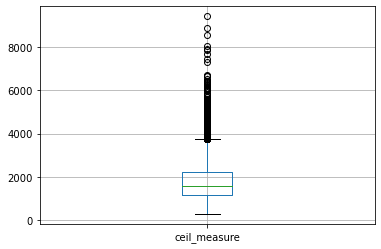

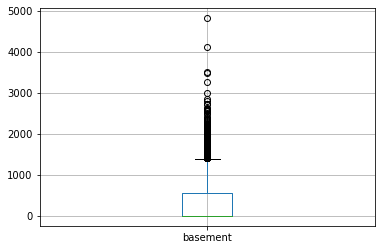

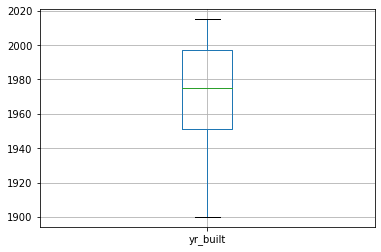

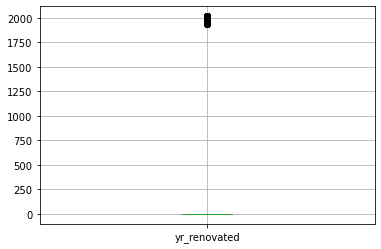

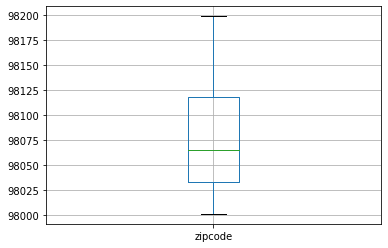

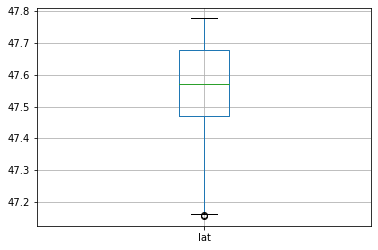

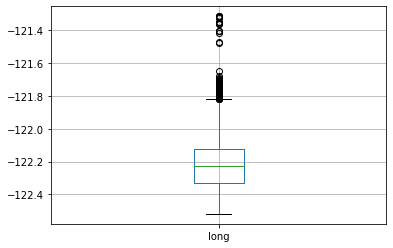

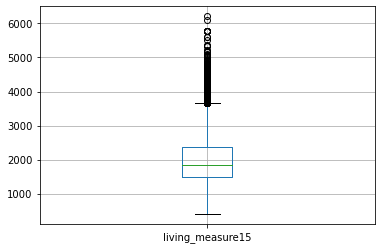

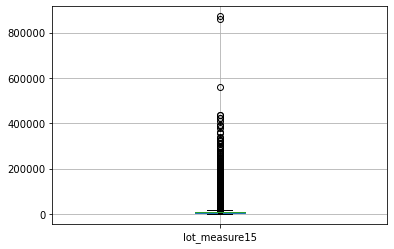

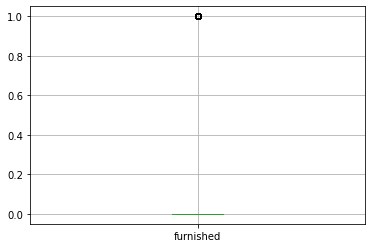

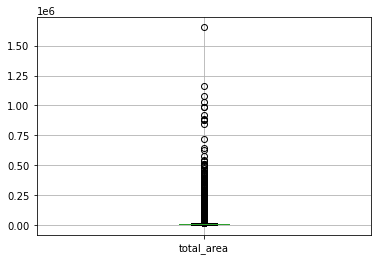

In [15]:

# size of plots to make it uniform throughout our analysis in the notebook
plotSizeX = 12
plotSizeY = 6
# let's boxplot all the numerical columns and see if there any outliers
for i in house_df.iloc[:, 2:].columns:
    house_df.iloc[:, 1:].boxplot(column=i)
    plt.show()

##### Analyzing Feature: cid

In [16]:
#cid - CID is appearing muliple times, it seems data contains house which is sold multiple times
cid_count=house_df.cid.value_counts()
cid_count[cid_count>1].shape


(176,)

##### Analyzing Feature: dayhours


In [17]:
#we will create new data frame that can be used for modeling
#We will convert the dayhours to 'month_year' as sale month-year is relevant for analysis

house_dfr=house_df.copy()
house_df.dayhours=house_df.dayhours.str.replace('T000000', "")
house_df.dayhours=pd.to_datetime(house_df.dayhours,format='%Y%m%d')
house_df['month_year']=house_df['dayhours'].apply(lambda x: x.strftime('%B-%Y'))
house_df['month_year'].head()

0    November-2014
1    December-2014
2       April-2015
3         May-2014
4       April-2015
Name: month_year, dtype: object

In [18]:
house_df['month_year'].value_counts()

April-2015        2231
July-2014         2211
June-2014         2180
August-2014       1940
October-2014      1878
March-2015        1875
September-2014    1774
May-2014          1768
December-2014     1471
November-2014     1411
February-2015     1250
January-2015       978
May-2015           646
Name: month_year, dtype: int64

In [19]:
house_df.groupby(['month_year'])['price'].agg('mean')

month_year
April-2015        561933.463021
August-2014       536527.039691
December-2014     524602.893270
February-2015     507919.603200
January-2015      525963.251534
July-2014         544892.161013
June-2014         558123.736239
March-2015        544057.683200
May-2014          548166.600113
May-2015          558193.095975
November-2014     522058.861800
October-2014      539127.477636
September-2014    529315.868095
Name: price, dtype: float64

##### Analyzing Feature: Price (our Target)

In [20]:
house_df.price.describe()

count    2.161300e+04
mean     5.401822e+05
std      3.673622e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

C:\Users\arun.a\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

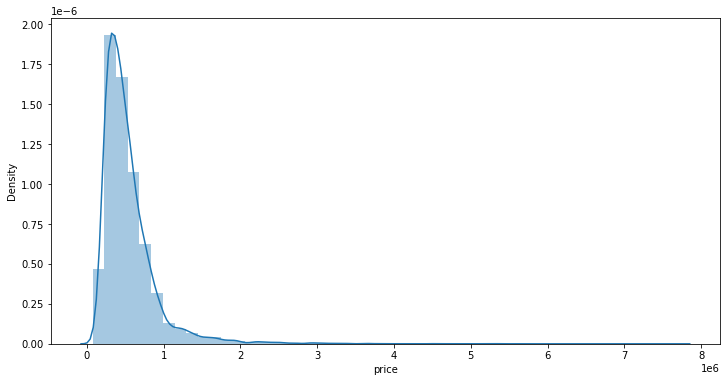

In [21]:
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.distplot(house_df['price'])

##### Analyzing Feature: room_bed

In [ ]:
# let's plot all the variables and confirm our above deduction with more confidence
sns.pairplot(house_df, diag_kind = 'kde')